# ML Challenge

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps:
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## Dataset


In [6]:
# DO NOT MODIFY
loan_data = pd.read_csv("loan_approval.csv")


## EDA
Uncomment to see desired output. Add more analysis if you like

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    

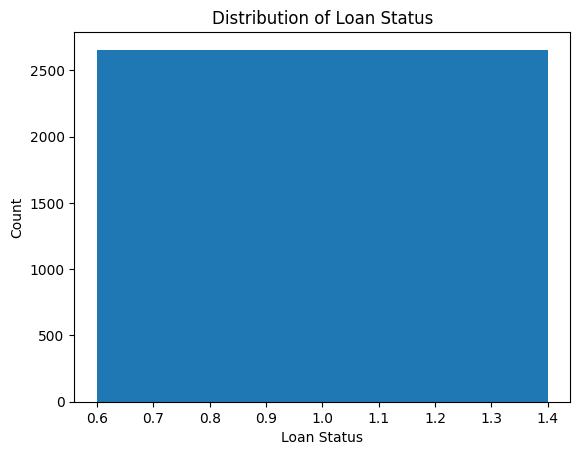

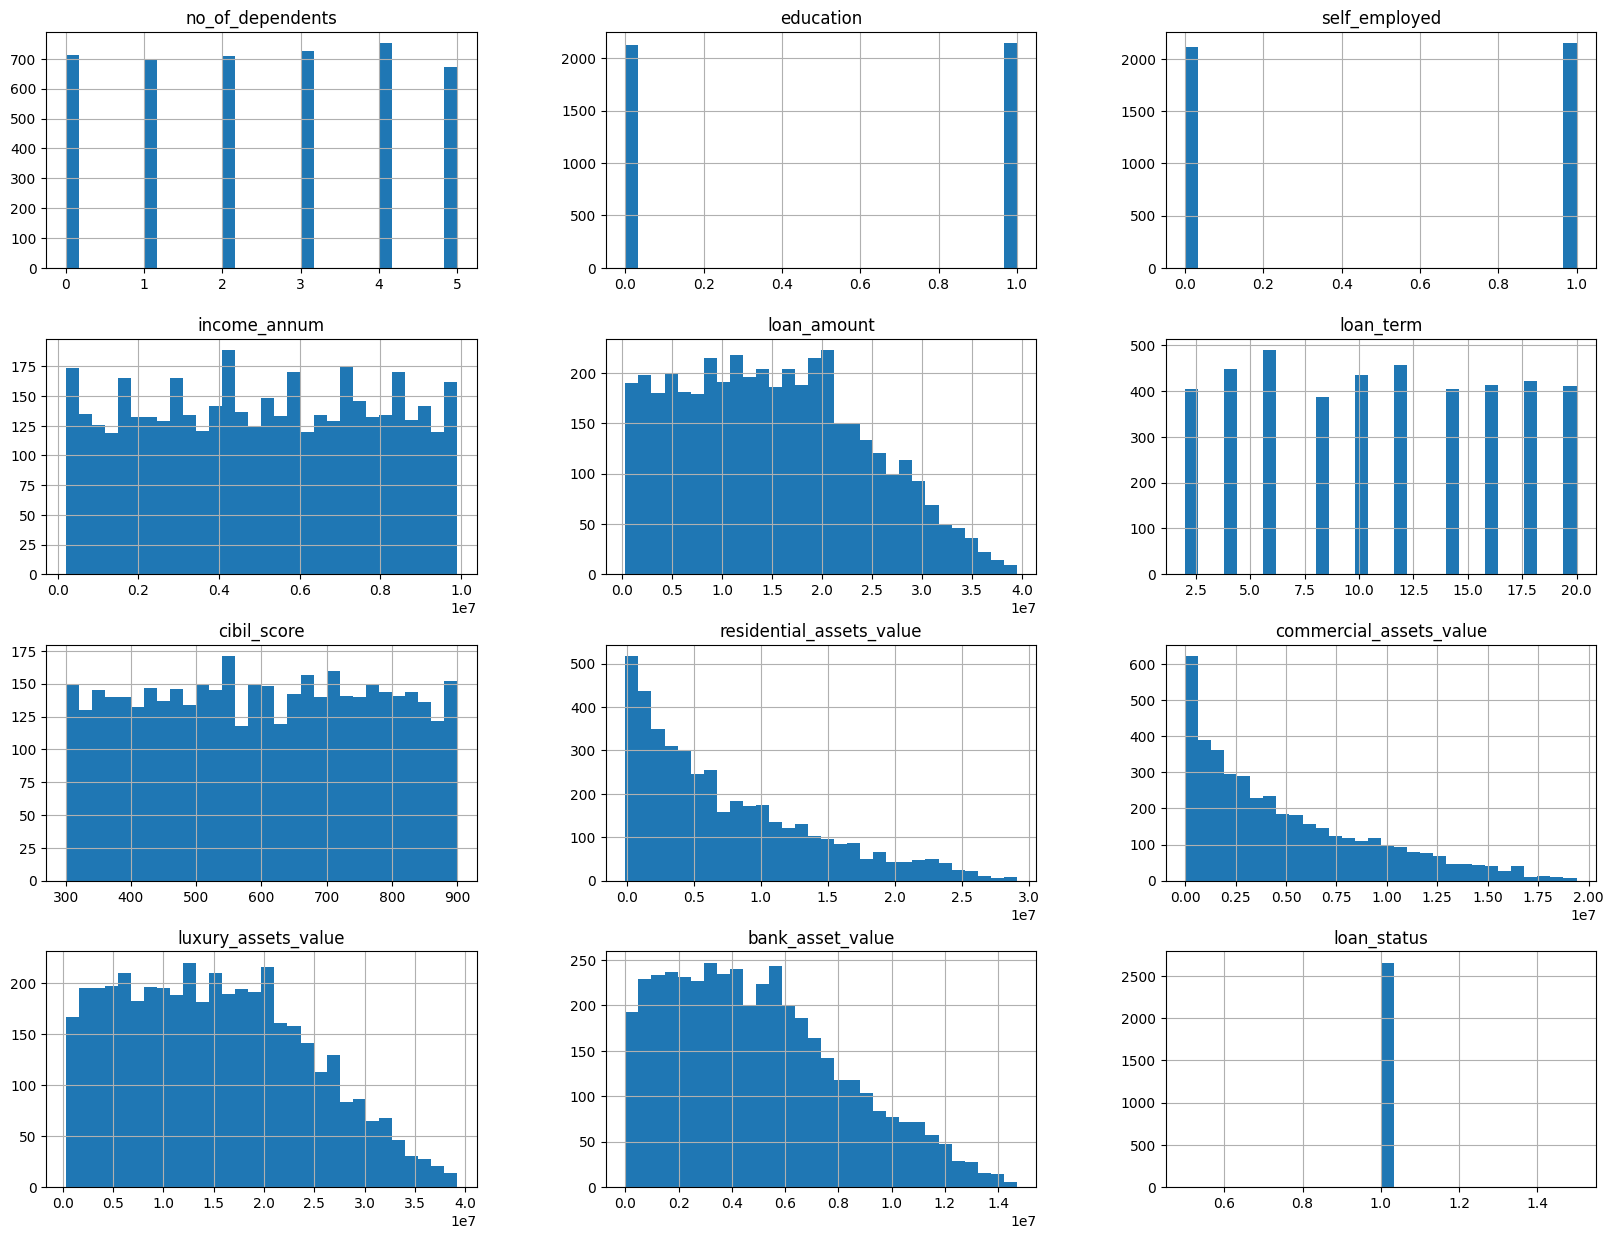

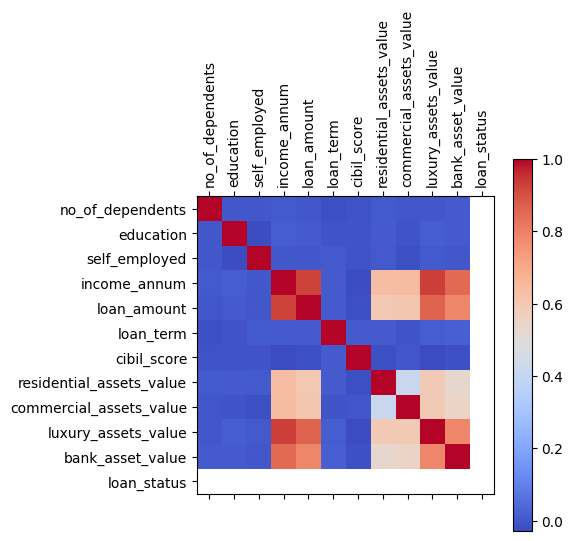

In [8]:
import matplotlib.pyplot as plt

# ------ Display basic information ------
print(loan_data.columns)
print(loan_data.describe())

# ------ Check for missing values ------
print(loan_data.isnull().sum())

# Fill missing values separately for numeric and categorical columns
# For numeric columns, we'll use the median
numeric_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numeric_columns] = loan_data[numeric_columns].fillna(loan_data[numeric_columns].median())

# For categorical columns, we'll use the mode (most frequent value)
categorical_columns = loan_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    loan_data[column] = loan_data[column].fillna(loan_data[column].mode()[0])

# Confirm that there are no more missing values
print(loan_data.isnull().sum())

# ------ Convert categorical variables to numeric ------
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Denied': 0})

# Drop unnecessary columns like loan_id
loan_data = loan_data.drop(columns=['loan_id'])

# ------ Visualize the distribution of loan status ------
loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# ------ Visualize the distribution of numerical features ------
loan_data.hist(bins=30, figsize=(20, 15))
plt.show()

# ------ Correlation matrix ------
corr_matrix = loan_data.corr()
plt.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [10]:
# Convert categorical variables to numerical values

# Education: Graduate -> 1, Not Graduate -> 0
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})

# Self Employed: Yes -> 1, No -> 0
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})

# Loan Status: Approved -> 1, Denied -> 0
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Denied': 0})

# Fill missing values in numerical columns with median (as part of feature engineering)
loan_data.fillna(loan_data.median(), inplace=True)

# Check if 'loan_id' exists before trying to drop it
if 'loan_id' in loan_data.columns:
    loan_data = loan_data.drop(columns=['loan_id'])

# Display the updated dataset
print(loan_data.head())


   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2        NaN            NaN       9600000     29900000   
1                 0        NaN            NaN       4100000     12200000   
2                 3        NaN            NaN       9100000     29700000   
3                 3        NaN            NaN       8200000     30700000   
4                 5        NaN            NaN       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  loan_status  
0     

## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ...

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)




```
# This is formatted as code
```

## Model Training and Evaluation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

X = loan_data.drop(columns=['loan_status'])
y = loan_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns

valid_numeric_columns = [col for col in numeric_columns if X_train[col].notna().any()]
valid_categorical_columns = [col for col in categorical_columns if X_train[col].notna().any()]

X_train[valid_numeric_columns] = numeric_imputer.fit_transform(X_train[valid_numeric_columns])
X_test[valid_numeric_columns] = numeric_imputer.transform(X_test[valid_numeric_columns])

X_train[valid_categorical_columns] = categorical_imputer.fit_transform(X_train[valid_categorical_columns])
X_test[valid_categorical_columns] = categorical_imputer.transform(X_test[valid_categorical_columns])

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


ValueError: at least one array or dtype is required

## Model Optimization and Testing

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best hyperparameters: {best_params}")

y_pred_optimized = best_model.predict(X_test)

print(f"Optimized Model Accuracy: {accuracy_score(y_test, y_pred_optimized)}")
print("Confusion Matrix for Optimized Model:")
print(confusion_matrix(y_test, y_pred_optimized))
print("Classification Report for Optimized Model:")
print(classification_report(y_test, y_pred_optimized))
